## Laboratorio 6 - Regresión logística con IRIS dataset

### Nicolás Echeverri Rojas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

## 1)

In [3]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
features=iris['data']
target=iris['target']

In [6]:
iris['target_names'],iris['feature_names']

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

### 2) Construcción de DataFrame

In [7]:
df=pd.DataFrame ( data=features, columns=iris['feature_names'])
df['target']=target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3) Cambia el nombre de las columnas del dataframe, empleando intrucción como

In [9]:
A=['a b','b x','c x','d a']
"".join(A)


st='sdas das'
st.split()

['sdas', 'das']

In [10]:
[ "".join([c.capitalize() for c in cols.split() ] )
               for cols in df.columns ]

'''
cols.split(): separa un string en " " y lo pasa a una lista
c.capitalize(): Pone en mayúscula la primera letra


c.capitalize() for c in cols.split(): 
separa un nombre por espacios y arroja una lista la cual tiene cada 
valor en mayúscula

i.e sepal length (cm)--> [sepal, length, (cm)]
--> ['Sepal','Length',(Cm)]

"".join([c.capitalize() for c in cols.split() ]:
vuelve a juntarlos i.e ['Sepal','Length',(Cm)]-->SepalLength(Cm)


'''

'\ncols.split(): separa un string en " " y lo pasa a una lista\nc.capitalize(): Pone en mayúscula la primera letra\n\n\nc.capitalize() for c in cols.split(): \nsepara un nombre por espacios y arroja una lista la cual tiene cada \nvalor en mayúscula\n\ni.e sepal length (cm)--> [sepal, length, (cm)]\n--> [\'Sepal\',\'Length\',(Cm)]\n\n"".join([c.capitalize() for c in cols.split() ]:\nvuelve a juntarlos i.e [\'Sepal\',\'Length\',(Cm)]-->SepalLength(Cm)\n\n\n'

In [11]:
columns_name =[ "".join([c.capitalize() for c in cols.split() ] )
               for cols in df.columns ]

columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ] 
df.columns=cols

In [12]:
df.head(1)

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0


### 4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLength_cm  150 non-null    float64
 1   SepalWidth_cm   150 non-null    float64
 2   PetalLength_cm  150 non-null    float64
 3   PetalWidth_cm   150 non-null    float64
 4   Target          150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Existen 150 datos

In [14]:
df.isnull().sum()

SepalLength_cm    0
SepalWidth_cm     0
PetalLength_cm    0
PetalWidth_cm     0
Target            0
dtype: int64

No existen valores nulos

In [15]:
df.describe()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


A primera vista los valores de cada característica están acordes puesto que no existe valores iguales a 0 ni tampoco valores muy extremos 

### 5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlación

<AxesSubplot:xlabel='Target', ylabel='count'>

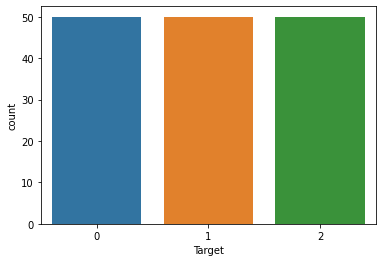

In [16]:
sns.countplot(x='Target',data=df)

Se observa que los datos están totalmente balanceados

<AxesSubplot:xlabel='Target', ylabel='SepalLength_cm'>

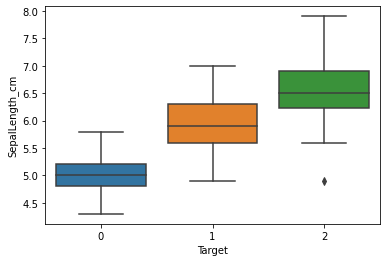

In [17]:
sns.boxplot(x='Target',y='SepalLength_cm',data=df)

Las flores tipo 2 poseen SepalLength mayor que las demás

<AxesSubplot:xlabel='Target', ylabel='SepalWidth_cm'>

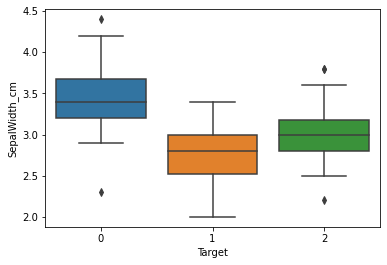

In [18]:
sns.boxplot(x='Target',y='SepalWidth_cm',data=df)

Las flores tipo 0 poseen SepalWidth mayor que las demás

<AxesSubplot:xlabel='Target', ylabel='PetalLength_cm'>

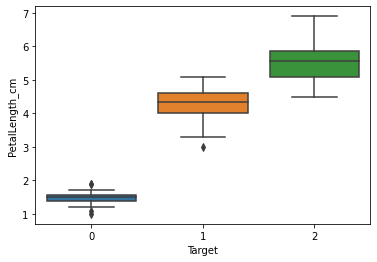

In [19]:
sns.boxplot(x='Target',y='PetalLength_cm',data=df)

Las flores tipo 2 poseen PetalLength mayor que las demás

<AxesSubplot:xlabel='Target', ylabel='PetalWidth_cm'>

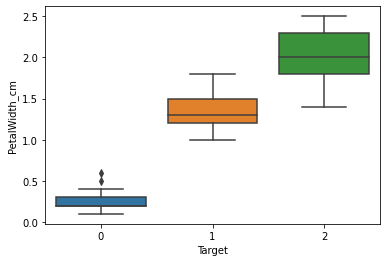

In [20]:
sns.boxplot(x='Target',y='PetalWidth_cm',data=df)

Las flores tipo 2 poseen mayor valor de petal width en comparación a las demás

<AxesSubplot:xlabel='PetalWidth_cm', ylabel='PetalLength_cm'>

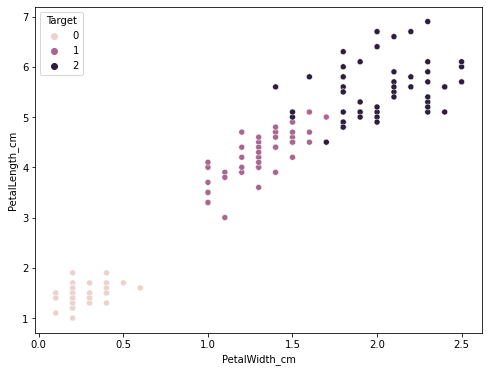

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PetalWidth_cm',y='PetalLength_cm', hue='Target',data=df)

Se observa que las características 'PetalWidth_cm','PetalLength_cm' clasifican muy bien el tipo de flores

<AxesSubplot:xlabel='SepalWidth_cm', ylabel='SepalLength_cm'>

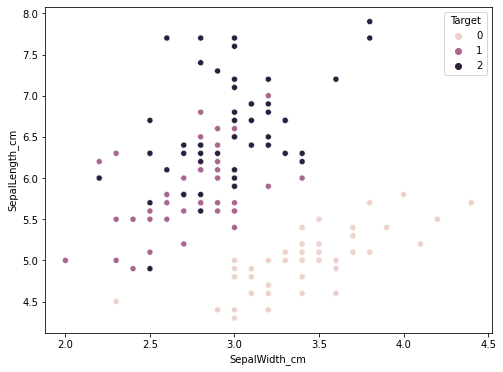

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SepalWidth_cm',y='SepalLength_cm', hue='Target',data=df)

Se observa que los valores de SepalLength y SepalWidth no permiten discriminar entre las flores tipo 1 y 2 pero si entre las flores 0 y 1 y 0 y 2 

### 6.Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [23]:
df.corr()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
SepalLength_cm,1.000000,-0.117570,0.871754,0.817941,0.782561
SepalWidth_cm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PetalLength_cm,0.871754,-0.428440,1.000000,0.962865,0.949035
PetalWidth_cm,0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

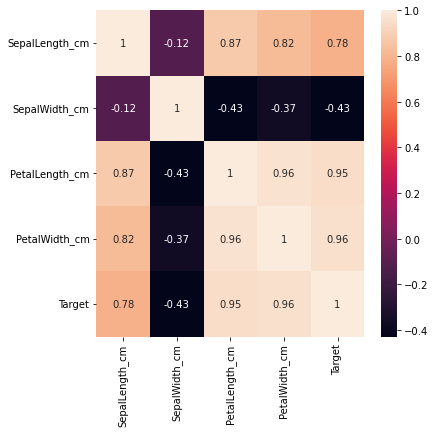

In [24]:
corr=df.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

Existen características muy correlacionadas

- PetalWidth y SepalLength: 0.82
- PetalLength y SepalWidth: 0.96

El Target y PetalWidth están muy correlacionadas: 0.96

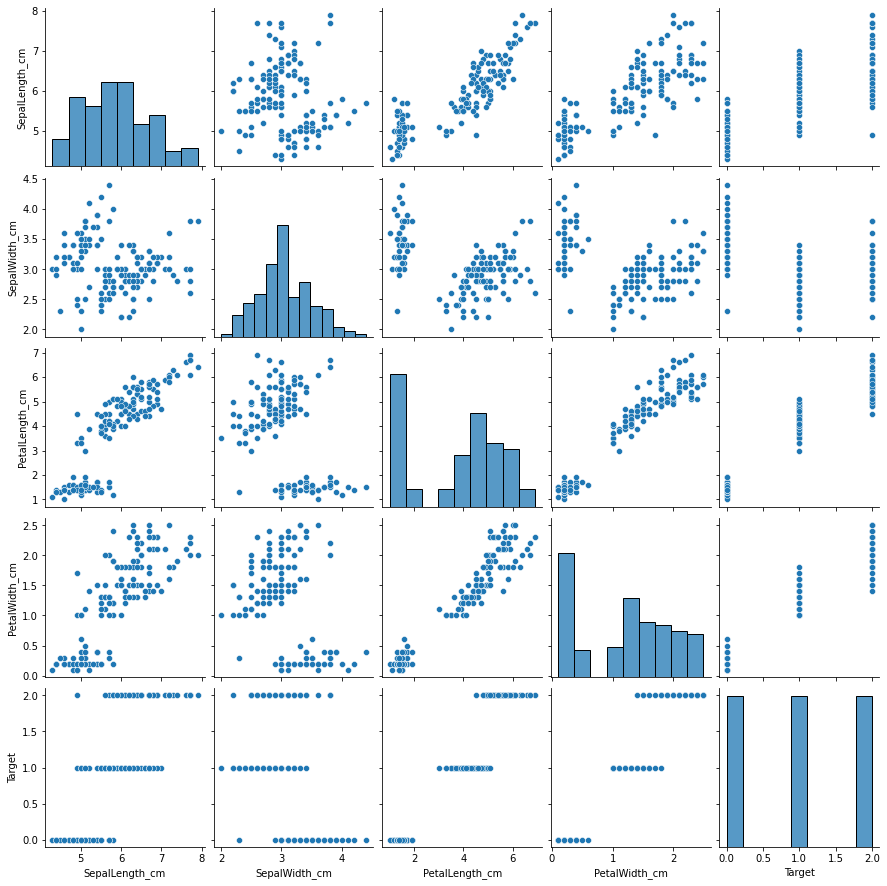

In [25]:
sns.pairplot(data=df)

### 7 Separar los datos en datos de entramiento y test, prueba la siguiente instruccion: "split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)"

Provides train/test indices to split data in train/test sets

returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

n_splits: Number of re-shuffling & splitting iterations

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split = StratifiedShuffleSplit(n_splits = 10, test_size=0.2, random_state=42)

In [28]:
for train_index, test_index in split.split(df, df["Target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    

<AxesSubplot:xlabel='Target', ylabel='count'>

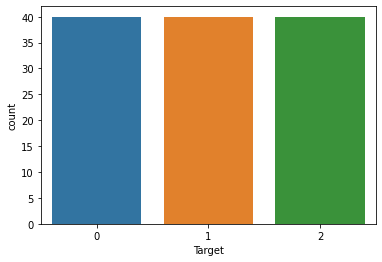

In [29]:
sns.countplot(x='Target',data=strat_train_set)

<AxesSubplot:xlabel='Target', ylabel='count'>

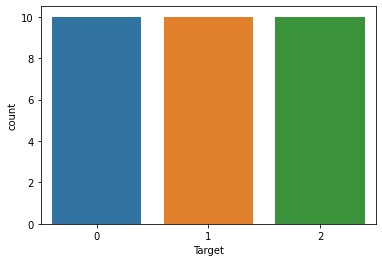

In [30]:
sns.countplot(x='Target',data=strat_test_set)

Se observa que el StratifiedShuffleSplit conserva la cantidad de targets en cada set

### 8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.

setosa:0
No setosa: 1

In [31]:
strat_train_set['Target_0to0']=strat_train_set['Target'].replace({0: 0, 1:1, 2:1})
strat_test_set['Target_0to0']=strat_test_set['Target'].replace({0: 0, 1:1, 2:1})

In [32]:
strat_train_set.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target,Target_0to0
65,6.7,3.1,4.4,1.4,1,1
44,5.1,3.8,1.9,0.4,0,0
11,4.8,3.4,1.6,0.2,0,0
130,7.4,2.8,6.1,1.9,2,1
33,5.5,4.2,1.4,0.2,0,0


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
X_train=strat_train_set.drop(['Target','Target_0to0'],axis=1)
y_train=strat_train_set['Target_0to0']


X_test=strat_test_set.drop(['Target','Target_0to0'],axis=1)
y_test=strat_test_set['Target_0to0']

In [35]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [36]:
logisticRegr.intercept_,logisticRegr.coef_

(array([-6.13729352]),
 array([[ 0.41289921, -0.90038627,  2.21937423,  0.92218368]]))

In [37]:
logisticRegr.score(X_train,y_train)

1.0

In [38]:
logisticRegr.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0])

In [39]:
logisticRegr.score(X_test,y_test)

1.0

La regresión logística pudo clasificar correctamente el 100% de los datos de train y test

### 9. Determine  la frontera de clasificación:

Entrenando el algoritmo con sólo una característica

In [40]:
X_train=strat_train_set['PetalLength_cm'].values.reshape(-1,1)
y_train=strat_train_set['Target_0to0'].values

X_test=strat_test_set['PetalLength_cm'].values.reshape(-1,1)
y_test=strat_test_set['Target_0to0'].values

In [41]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [42]:
logisticRegr.score(X_train,y_train)


1.0

In [43]:
logisticRegr.score(X_test,y_test)

1.0

El modelo es capaz de predecir el 100% de los resultados de manera correcta tanto en el train como el el test set

In [44]:
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)

#Generamos los valores de 
X_new_prob = logisticRegr.predict_proba(X_new)

In [45]:
#En este orden se muestra las probabilidades de pertenecer a cada característica en X_new_prob
#i.e el primer elemento corresponde a la probabilidad de pertencer a 0
# y el segundo elemento corresponde a la probabilidad de pertencer a 1
logisticRegr.classes_ 

array([0, 1])

In [46]:
X_new_prob

array([[1.00000000e+00, 3.85599026e-16],
       [1.00000000e+00, 4.07809763e-16],
       [1.00000000e+00, 4.31299851e-16],
       ...,
       [1.46264556e-09, 9.99999999e-01],
       [1.38298484e-09, 9.99999999e-01],
       [1.30766264e-09, 9.99999999e-01]])

In [47]:
decision_boundary = X_new[X_new_prob[:,1]>0.5][0][0]
print("la frontera de clasificación se da en x=",decision_boundary)

la frontera de clasificación se da en x= 2.6926926926926917


### 10) Encontrar una gráfica de la regresión logística  con los valores de probabilidad

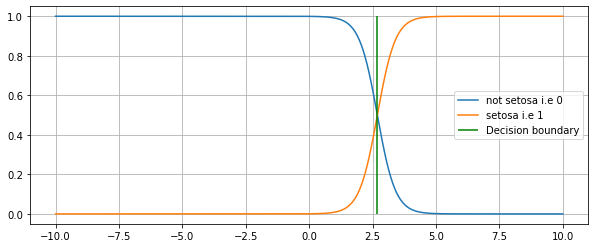

In [49]:
plt.figure(figsize=(10,4))
plt.plot(X_new,X_new_prob[:, 0], label='not setosa i.e 0')
plt.plot(X_new,X_new_prob[:, 1], label='setosa i.e 1')
plt.vlines(decision_boundary, ymin=0, ymax=1, label='Decision boundary', color='green')
plt.grid()
plt.legend()

### 11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.


In [50]:
X_train=strat_train_set.drop(['Target','Target_0to0'],axis=1)
y_train=strat_train_set['Target']

X_test=strat_test_set.drop(['Target','Target_0to0'],axis=1)
y_test=strat_test_set['Target']

In [51]:
logisticRegr=LogisticRegression()
logisticRegr.fit(X_train,y_train)

C:\Users\nico0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
logisticRegr.score(X_train,y_train),logisticRegr.score(X_test,y_test)

(0.9666666666666667, 0.9666666666666667)

### Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica? 

In [53]:
prediction=logisticRegr.predict_proba([[4.9,5.0, 1.8, 0.3]])

C:\Users\nico0\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
logisticRegr.classes_,   iris.target_names

(array([0, 1, 2]), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [55]:
for i in range(len(iris.target_names)):
    print(f"la probabilidad de que sea {iris.target_names[i]} es {prediction[0][i]} ")

la probabilidad de que sea setosa es 0.9946084707899358 
la probabilidad de que sea versicolor es 0.005391428728671461 
la probabilidad de que sea virginica es 1.0048139258312125e-07 


###  13. Normalizar cada columna respecto a su media y desviacion estandar

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [70]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [71]:
logisticRegr=LogisticRegression()
logisticRegr.fit(X_train_scaled,y_train)
logisticRegr.score(X_train_scaled,y_train),logisticRegr.score(X_test_scaled,y_test)

(0.9666666666666667, 0.9333333333333333)

Al normalizar los datos el modelo baja un poco su desempeño 

### 14. Curvas de aprendizaje

In [79]:
from sklearn.model_selection import learning_curve

In [78]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\nico0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

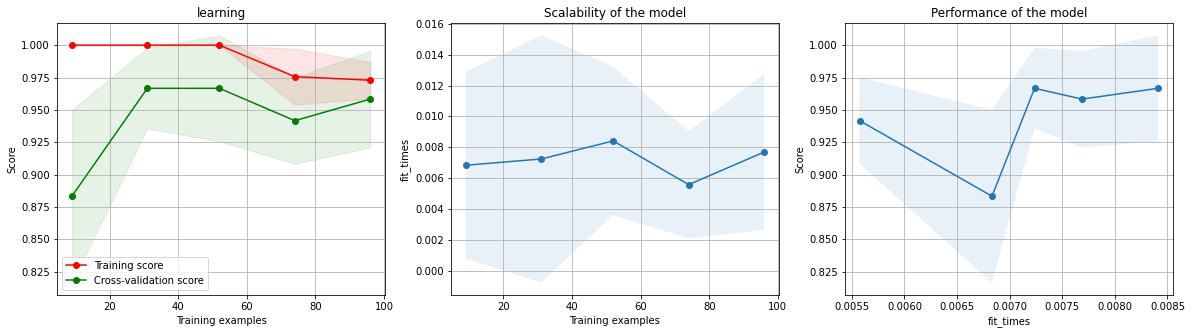

In [80]:
plot_learning_curve(logisticRegr,
                    'learning',X_train_scaled,y_train)


Se observa que a mayor muestras de entrenamiento, mayor es el acercamiento del score de los datos de validation a los de train lo que indica que no está sucediendo overfitting

### 15 Detección de outliers

In [58]:
X_train

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm
65,6.7,3.1,4.4,1.4
44,5.1,3.8,1.9,0.4
11,4.8,3.4,1.6,0.2
130,7.4,2.8,6.1,1.9
33,5.5,4.2,1.4,0.2
...,...,...,...,...
82,5.8,2.7,3.9,1.2
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
16,5.4,3.9,1.3,0.4


In [73]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

IQR

SepalLength_cm    1.3
SepalWidth_cm     0.5
PetalLength_cm    3.5
PetalWidth_cm     1.5
Target            2.0
dtype: float64

In [74]:
condition= ~( (df> (Q3+1.5*IQR) ) | (df <(Q1-1.5*IQR)  ) ).any(axis=1)
dfClean=df[condition].reset_index(drop=True)

In [77]:
df.shape

(150, 5)

In [76]:
dfClean.shape

(146, 5)